
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



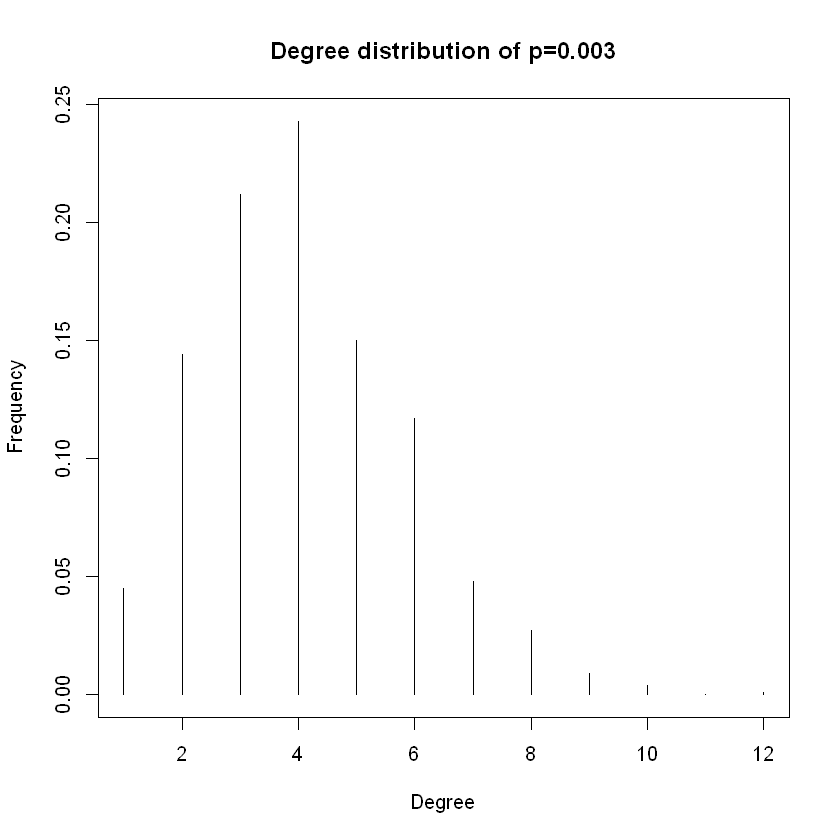

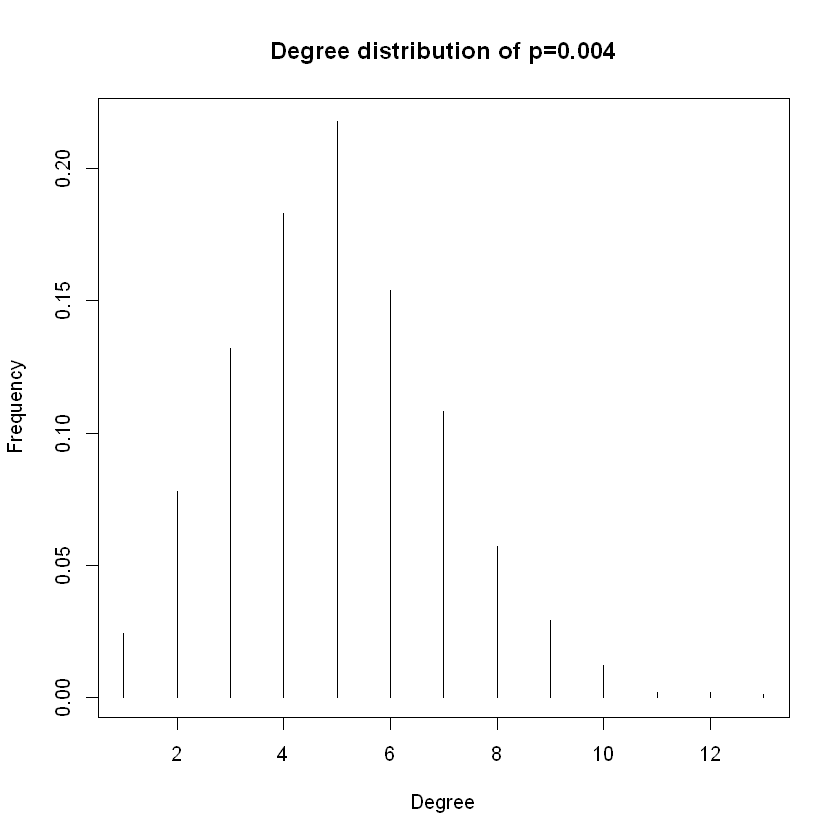

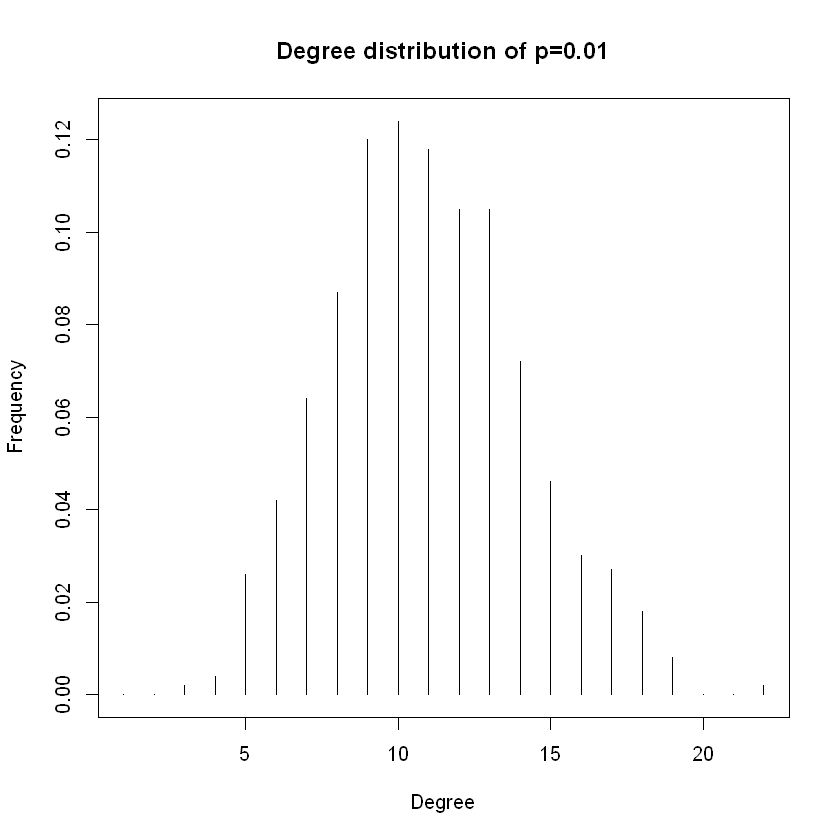

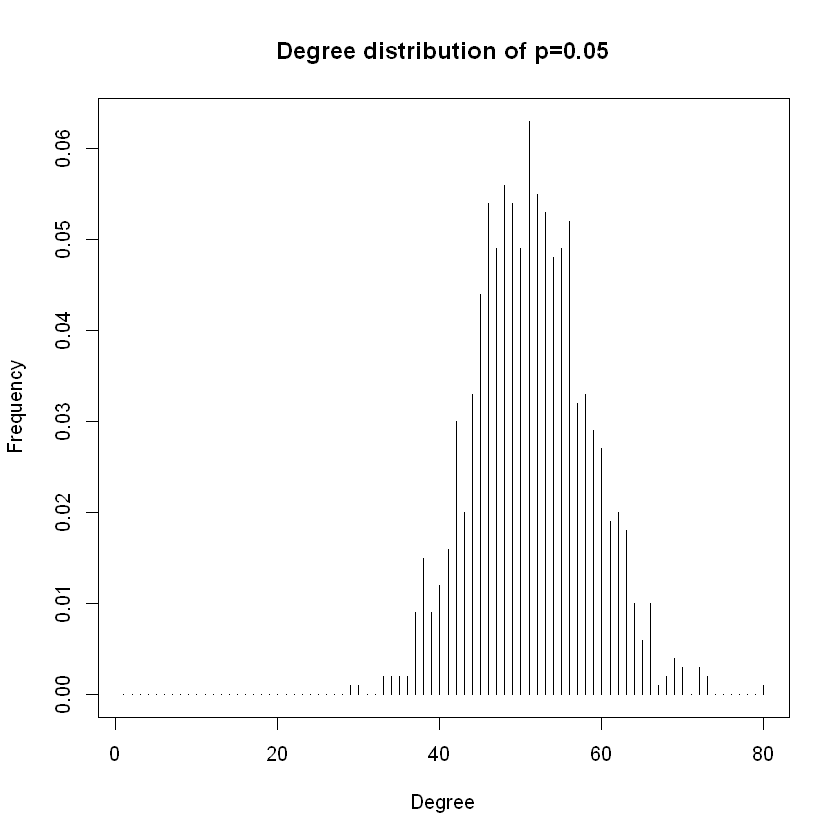

p = 0.003 --- Mean = 3.078 Variance = 3.105021 
p = 0.004 --- Mean = 3.974 Variance = 3.897221 
p = 0.01 --- Mean = 9.948 Variance = 9.995291 
p = 0.05 --- Mean = 50.352 Variance = 49.46756 
p = 0.1 --- Mean = 99.544 Variance = 85.69776 


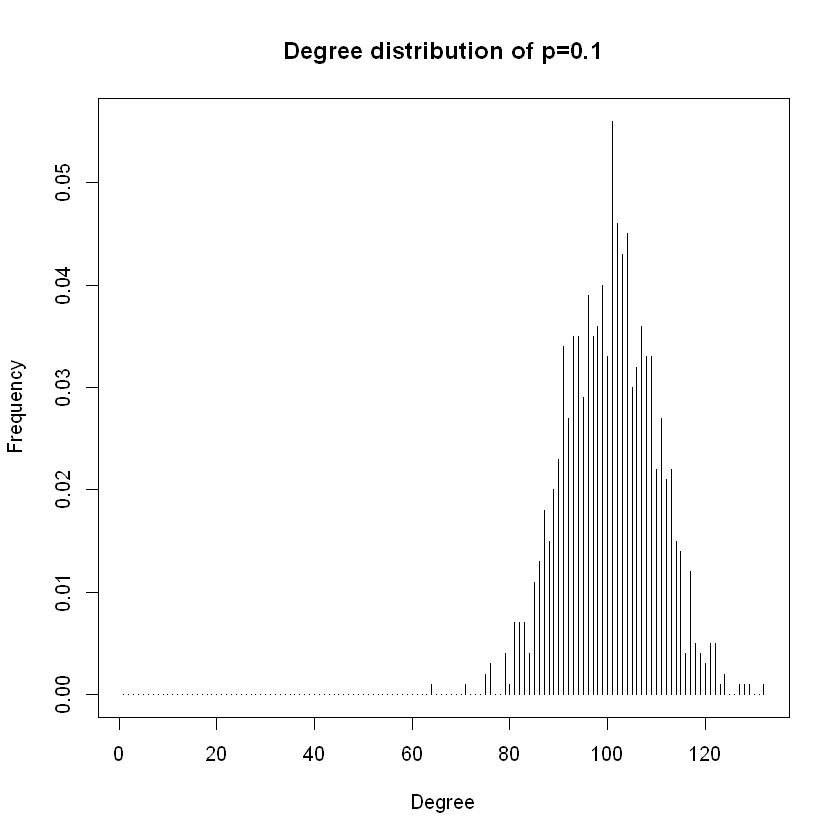

In [1]:
# 1.(a)

library('igraph')
p <- c(0.003, 0.004, 0.01, 0.05, 0.1)

g1 <- erdos.renyi.game(n=1000, p = p[1], directed = FALSE)
g2 <- erdos.renyi.game(n=1000, p = p[2], directed = FALSE)
g3 <- erdos.renyi.game(n=1000, p = p[3], directed = FALSE)
g4 <- erdos.renyi.game(n=1000, p = p[4], directed = FALSE)
g5 <- erdos.renyi.game(n=1000, p = p[5], directed = FALSE)

plot(degree.distribution(g1),type="h",main="Degree distribution of p=0.003",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g2),type="h",main="Degree distribution of p=0.004",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g3),type="h",main="Degree distribution of p=0.01",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g4),type="h",main="Degree distribution of p=0.05",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g5),type="h",main="Degree distribution of p=0.1",xlab="Degree",ylab="Frequency")


cat("p =", p[1],"---", "Mean =", mean(degree(g1)), "Variance =", var(degree(g1)),"\n")
cat("p =", p[2],"---", "Mean =", mean(degree(g2)), "Variance =", var(degree(g2)),"\n")
cat("p =", p[3],"---", "Mean =", mean(degree(g3)), "Variance =", var(degree(g3)),"\n")
cat("p =", p[4],"---", "Mean =", mean(degree(g4)), "Variance =", var(degree(g4)),"\n")
cat("p =", p[5],"---", "Mean =", mean(degree(g5)), "Variance =", var(degree(g5)),"\n")


In [2]:
# 1.(b)
cat("Random Undirected Graph (with p=0.003) is connected?", (is.connected(g1)), "\n")
cat("Random Undirected Graph (with p=0.004) is connected?", (is.connected(g2)), "\n")
cat("Random Undirected Graph (with p=0.01) is connected?", (is.connected(g3)), "\n")
cat("Random Undirected Graph (with p=0.05) is connected?", (is.connected(g4)), "\n")
cat("Random Undirected Graph (with p=0.1) is connected?", (is.connected(g5)), "\n")

count1 <- count2 <- count3 <- count4 <- count5 <-0
diameter1 <- diameter2 <- diameter3 <-0

for(i in 1:100){
    g1 <- erdos.renyi.game(n=1000, p = p[1], directed = FALSE)
    g2 <- erdos.renyi.game(n=1000, p = p[2], directed = FALSE)
    g3 <- erdos.renyi.game(n=1000, p = p[3], directed = FALSE)
    g4 <- erdos.renyi.game(n=1000, p = p[4], directed = FALSE)
    g5 <- erdos.renyi.game(n=1000, p = p[5], directed = FALSE)
    
    count1 <- count1 + is.connected(g1)
    count2 <- count2 + is.connected(g2)
    count3 <- count3 + is.connected(g3)
    count4 <- count4 + is.connected(g4)
    count5 <- count5 + is.connected(g5)
    g1.components <- clusters(g1)
    ix <- which.max(g1.components$csize)
    g1.giant <- induced.subgraph(g1, which(g1.components$membership == ix))
    diameter1 <- diameter1 + diameter(g1.giant)
    g2.components <- clusters(g2)
    ix <- which.max(g2.components$csize)
    g2.giant <- induced.subgraph(g2, which(g2.components$membership == ix))
    diameter2 <- diameter2 + diameter(g2.giant)
    if(!is.connected(g3)){
        g3.components <- clusters(g3)
        ix <- which.max(g3.components$csize)
        g3.giant <- induced.subgraph(g3, which(g3.components$membership == ix))
        diameter3 <- diameter3 + diameter(g3)
    }
    
}

cat("\n")
cat("Probability of Random Undirected Graph (with p=0.003) is ", count1, " CONNECTED with diameter :", diameter1,"\n")
cat("Probability of Random Undirected Graph (with p=0.004) is ", count2, " CONNECTED with diameter :", diameter2,"\n")
cat("Probability of Random Undirected Graph (with p=0.01) is ", count3, " CONNECTED with diameter :",  diameter3,"\n")
cat("Probability of Random Undirected Graph (with p=0.05) is ", count4, "\n")
cat("Probability of Random Undirected Graph (with p=0.1) is ", count5, "\n")

Random Undirected Graph (with p=0.003) is connected? FALSE 
Random Undirected Graph (with p=0.004) is connected? FALSE 
Random Undirected Graph (with p=0.01) is connected? TRUE 
Random Undirected Graph (with p=0.05) is connected? TRUE 
Random Undirected Graph (with p=0.1) is connected? TRUE 

Probability of Random Undirected Graph (with p=0.003) is  0  CONNECTED with diameter : 1417 
Probability of Random Undirected Graph (with p=0.004) is  0  CONNECTED with diameter : 1096 
Probability of Random Undirected Graph (with p=0.01) is  93  CONNECTED with diameter : 38 
Probability of Random Undirected Graph (with p=0.05) is  100 
Probability of Random Undirected Graph (with p=0.1) is  100 


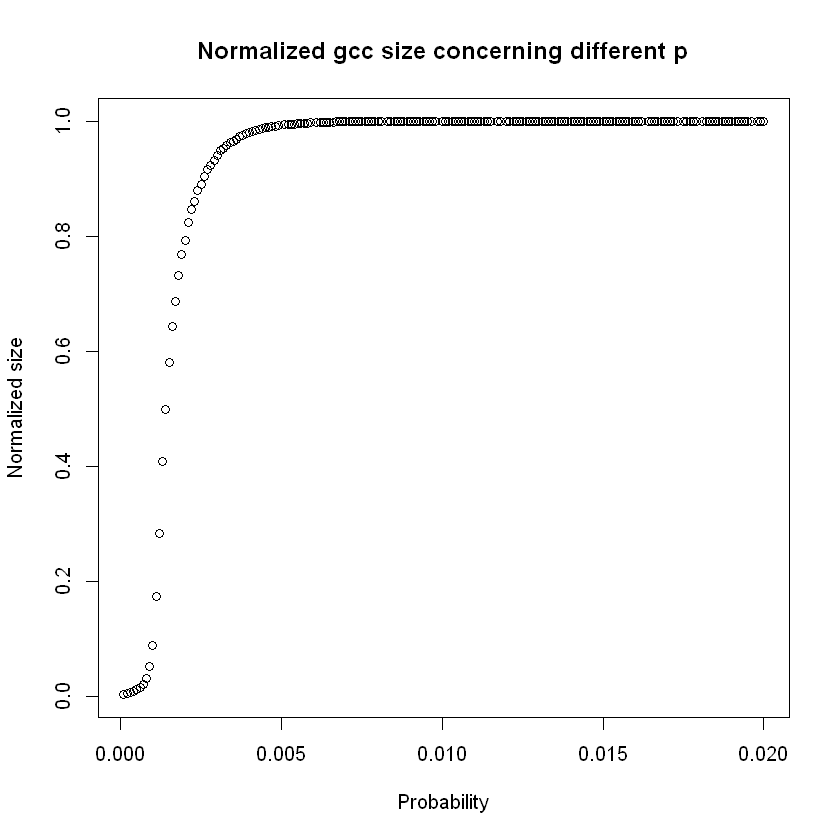

In [13]:
# 1.(c)
p <- seq(0.0001,0.02, 0.0001)
l <- vector()
for(p1 in p){
    normalized_gcc <- 0
    for(i in 1:100){
        g <- erdos.renyi.game(n=1000, p = p1, directed = FALSE)
        g.components <- clusters(g)
        ix <- max(g.components$csize)
        normalized_gcc <- normalized_gcc + ix
    }
    l[(p1-0.0001)/0.0001+1] <- normalized_gcc/100000
}
plot(p,l,main="Normalized gcc size concerning different p",xlab="Probability",ylab="Normalized size")


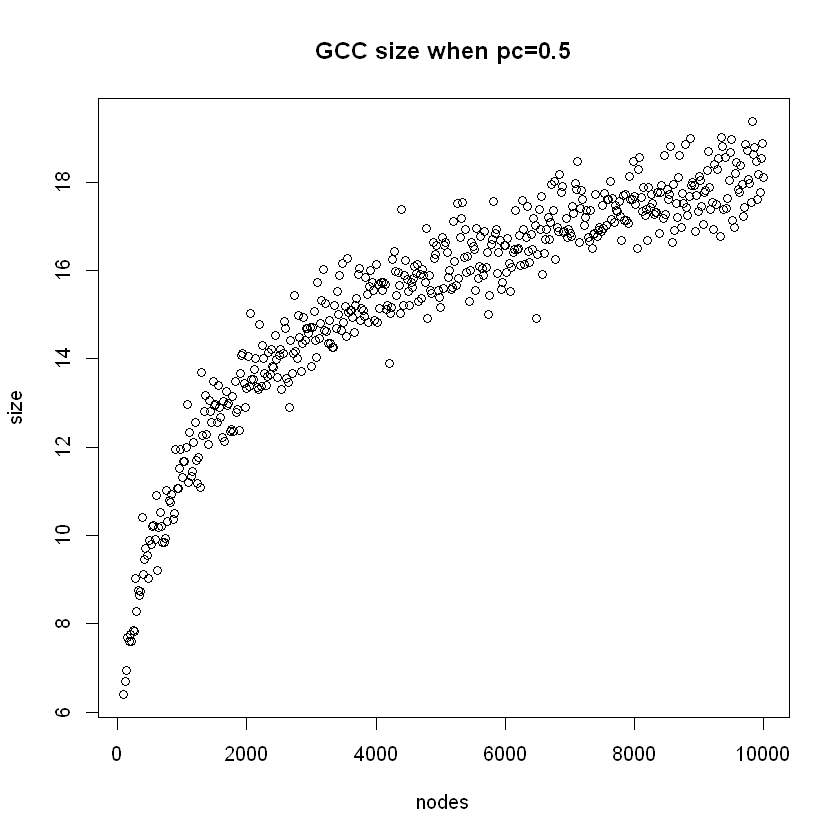

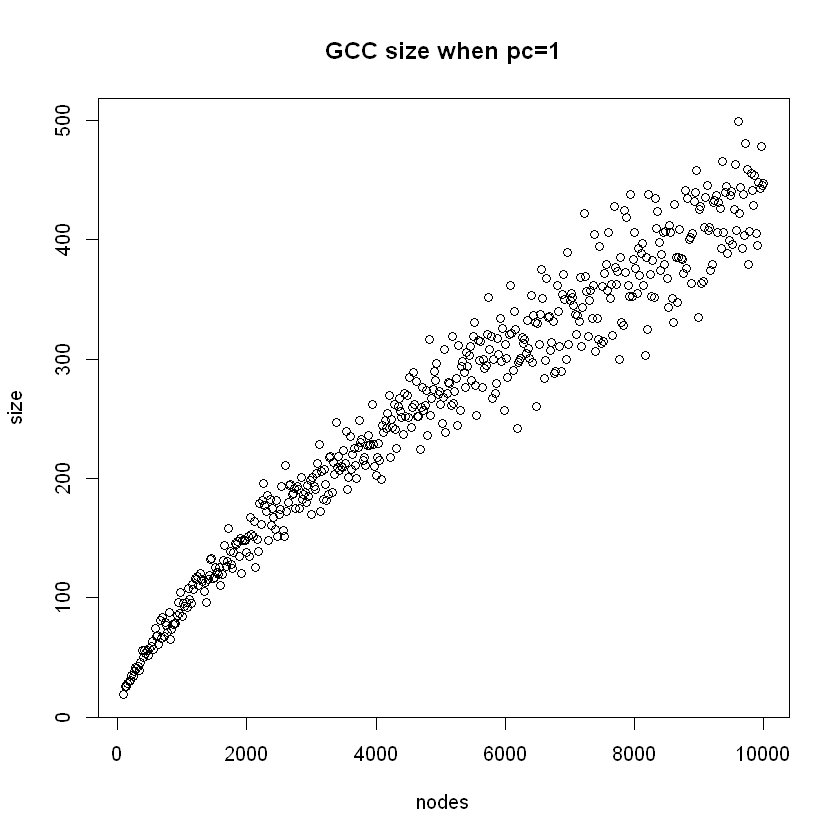

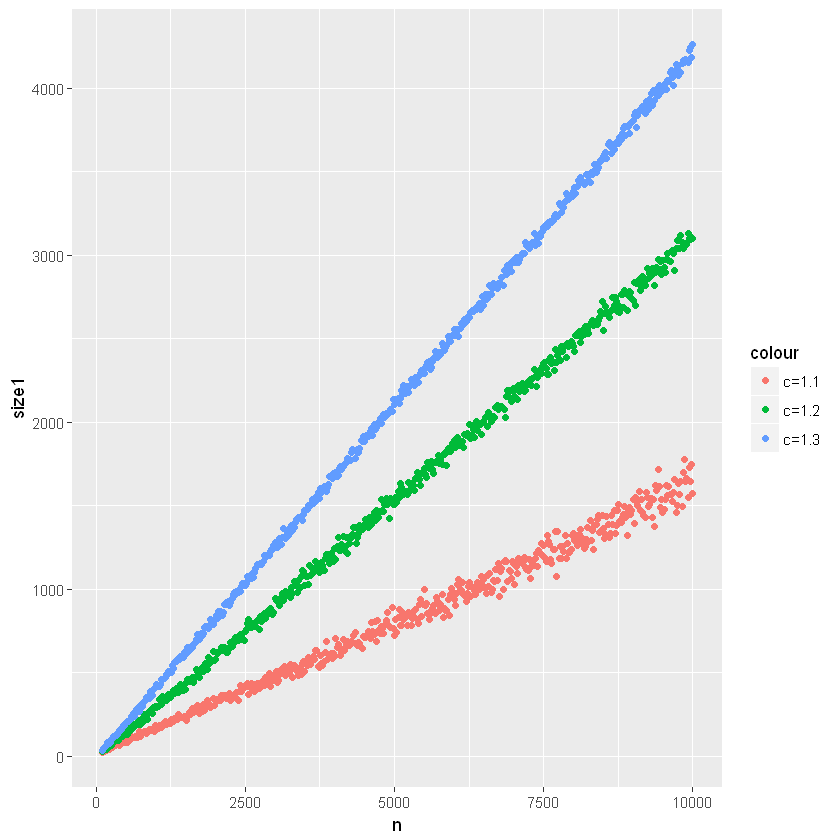

In [21]:
library('ggplot2')
# part 1.1.d.i
n <- seq(100, 10000，20)
size <- vector()
for(n1 in n){
    p1 <- 0.5/n1
    ix<-0
    for(i in 1:50){
        g <- erdos.renyi.game(n=n1, p=p1, directed = FALSE)
        g.components <- clusters(g)
        ix <- ix+max(g.components$csize)
    }
    size[(n1-100)/20+1] = ix/50.0
}
plot(n,size,main="GCC size when pc=0.5",xlab="nodes",ylab="size")

#part 1.1.d.ii
size <- vector()
for(n1 in n){
    p1 <- 1.0/n1
    ix<-0
    for(i in 1:50){
        g <- erdos.renyi.game(n=n1, p=p1, directed = FALSE)
        g.components <- clusters(g)
        ix <- ix+max(g.components$csize)
    }
    size[(n1-100)/20+1] = ix/50.0
}
plot(n,size,main="GCC size when pc=1",xlab="nodes",ylab="size")

#part 1.1.d.iii
size1 <- vector()
for(n1 in n){
    p1 <- 1.1/n1
    ix<-0
    for(i in 1:50){
        g <- erdos.renyi.game(n=n1, p=p1, directed = FALSE)
        g.components <- clusters(g)
        ix <- ix+max(g.components$csize)
    }
    size1[(n1-100)/20+1] = ix/50.0
}
size2 <- vector()
for(n1 in n){
    p1 <- 1.2/n1
    ix<-0
    for(i in 1:50){
        g <- erdos.renyi.game(n=n1, p=p1, directed = FALSE)
        g.components <- clusters(g)
        ix <- ix+max(g.components$csize)
    }
    size2[(n1-100)/20+1] = ix/50.0
}
size3 <- vector()
for(n1 in n){
    p1 <- 1.3/n1
    ix<-0
    for(i in 1:50){
        g <- erdos.renyi.game(n=n1, p=p1, directed = FALSE)
        g.components <- clusters(g)
        ix <- ix+max(g.components$csize)
    }
    size3[(n1-100)/20+1] = ix/50.0
}
df <- data.frame(n, size1, size2, size3)
ggplot(df, aes(n)) + 
  geom_point(aes(y = size1, colour = "c=1.1")) + 
  geom_point(aes(y = size2, colour = "c=1.2")) +
    geom_point(aes(y = size3, colour = "c=1.3")) 